In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

In [2]:
# Optional
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

In [3]:
# Parameters
betta = 0.95
alpha = 0.3
delta = 0.1
sigma = 0.25
tau = 0.1

In [4]:
nk = 200

wealth_min = 0.35
wealth_max = 6
wealth_grid = np.linspace(wealth_min, wealth_max, nk)

k_min = 0.1
k_max = 5.0
kgrid = np.linspace(k_min, k_max, nk)

In [5]:
# Initial Guess
k_guess = 0.5 * wealth_grid

In [6]:
tol = 1e-6
maxiter = 100
for i in range(maxiter):

    # Capital Choice
    kp = kgrid

    # Production and Wealth Tomorrow
    rp = alpha * kp ** (alpha - 1) + 1 - delta
    wp = kp ** alpha + (1 - delta) * kp

    # Capital Choice Tomorrow
    interp = scipy.interpolate.interp1d(wealth_grid, k_guess, kind='linear', fill_value='extrapolate')
    kpp = interp(wp)

    # Consumption Tomorrow
    cp = wp - kpp

    # Implied Consumption Today
    c = (betta * (1 - tau) * rp * cp ** (-sigma)) ** (-1 / sigma)

    # Implied Wealth Today
    w = kp + c

    # Interpolate New Policy
    interp = scipy.interpolate.interp1d(w, kp, kind='linear', fill_value='extrapolate')
    k_new = interp(wealth_grid)

    # Check Convergence
    diff = np.amax(np.abs(k_new - k_guess))
    print(i, diff)
    if diff < tol:
        break

    # Update Guess
    k_guess = k_new.copy()

0 0.1263984683499655
1 0.029511447633967625
2 0.014792873170191179
3 0.009783972094352222
4 0.005888959044243691
5 0.0030959231237965845
6 0.001537008477630053
7 0.000742305451192582
8 0.00035304669539160116
9 0.00016661322391886557
10 7.833888041242076e-05
11 3.674010557697116e-05
12 1.7207796131124553e-05
13 8.052309818484815e-06
14 3.768566455786271e-06
15 1.763828424206082e-06
16 8.255666967826869e-07


In [7]:
# corresponding capital
interp1 = scipy.interpolate.interp1d(wp, kp, kind='linear', fill_value='extrapolate')
k_today = interp1(w)
k_today = np.maximum(k_today, 0.0)

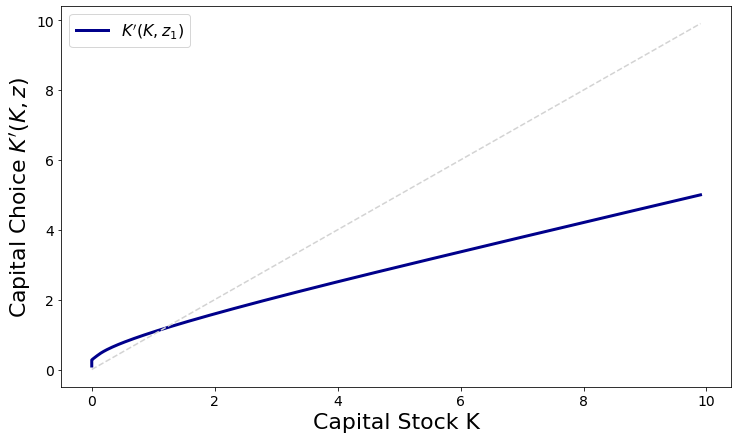

In [8]:
fig,ax=plt.subplots(figsize=(12,7))
ax.plot(k_today,kgrid,color="darkblue",linewidth=3,label="$K'(K,z_{1})$")
ax.plot(k_today, k_today, color='lightgrey', linestyle='dashed')

ax.set_ylabel("Capital Choice $K'(K,z)$", fontsize=22)
ax.set_xlabel("Capital Stock K", fontsize=22)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

plt.legend(fontsize= 16, loc='upper left')
plt.show()